In [46]:
#  Import libraries
import pandas as pd
import numpy as np

In [37]:
#  Load dataset
df = pd.read_csv('synthetic_credit_card_fraud_dataset.csv')

In [38]:
#  Drop non-useful features
df = df.drop(['user_id', 'card_number', 'expiry_date', 'cvv'], axis=1)

In [27]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
same_billing_shipping    0
ip_risk_score            0
label                    0
browser_Chrome           0
browser_Edge             0
browser_Firefox          0
browser_Safari           0
device_type_Desktop      0
device_type_Mobile       0
device_type_Tablet       0
time_of_day_Afternoon    0
time_of_day_Evening      0
time_of_day_Morning      0
time_of_day_Night        0
dtype: int64


In [29]:
# 4. Separate features and target
X = df.drop('label', axis=1)
y = df['label']
print(X, y)

      same_billing_shipping  ip_risk_score  browser_Chrome  browser_Edge  \
0                         0           0.83               0             0   
1                         1           0.18               1             0   
2                         0           0.09               1             0   
3                         0           0.87               0             1   
4                         1           0.72               1             0   
...                     ...            ...             ...           ...   
1995                      1           0.75               1             0   
1996                      1           0.17               0             0   
1997                      0           0.75               0             1   
1998                      0           0.04               0             0   
1999                      0           0.97               1             0   

      browser_Firefox  browser_Safari  device_type_Desktop  \
0                   0    

In [39]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
#  Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#  Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [42]:
#  Make predictions
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

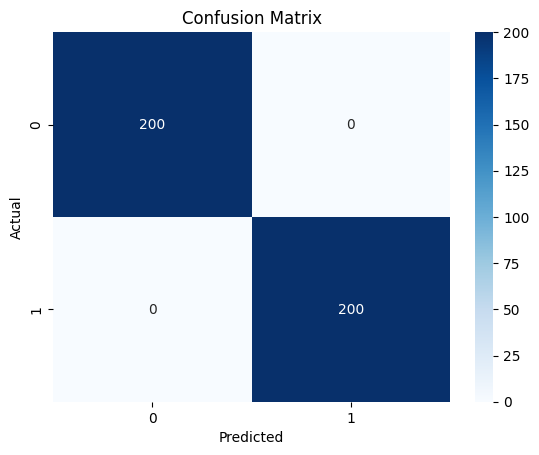

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

ROC AUC Score: 1.0000


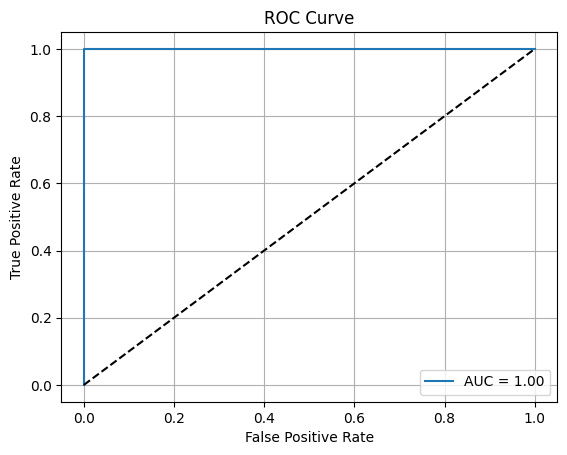

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

#  ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

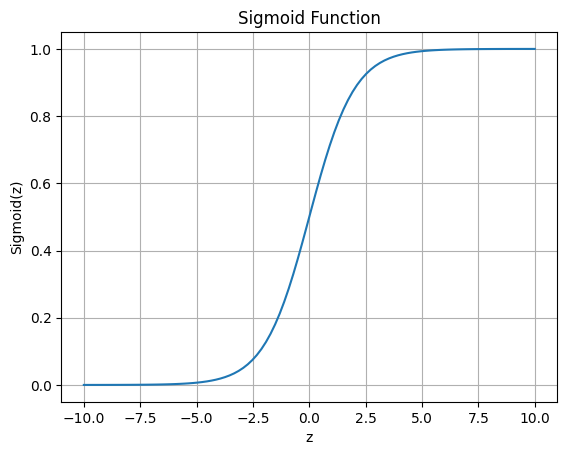

In [43]:
#  Visualize Sigmoid Function
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

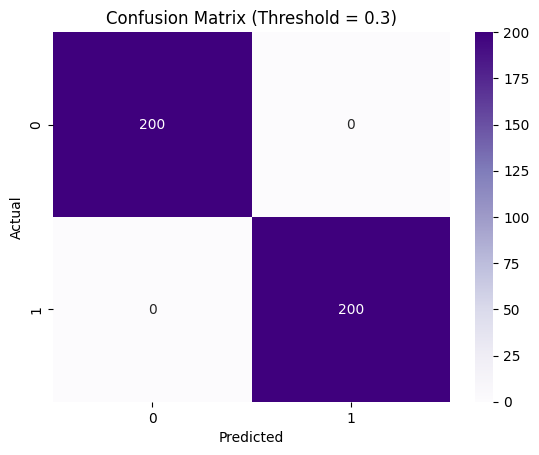

Classification Report (Threshold = 0.3):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [44]:
# Tune Threshold
threshold = 0.3  # try different values like 0.2 or 0.5
y_pred_thresh = (y_probs >= threshold).astype(int)

# New confusion matrix
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm_thresh, annot=True, fmt='d', cmap='Purples')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report for new threshold
print(f"Classification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_thresh))
